In [13]:
from hpsklearn import HyperoptEstimator
from hyperopt import tpe
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler 
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='vmeenaks', api_key='5s5CarWAAFqBB52t8L4J')
from hpsklearn import HyperoptEstimator, random_forest, svc, knn
from hyperopt import hp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.gridspec as gridspec
from sklearn.metrics import confusion_matrix
from nltk import ConfusionMatrix
import pandas as pd
import numpy as np
from datetime import datetime
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

In [6]:
orig_df = pd.read_csv("creditcard.csv")
df = orig_df.copy()

In [7]:
df["nAmount"] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [8]:
columns = ['V28','V27','V25','V24','V23','V22','V21','V20','V15','V13','V8','Time','Amount' ]
df.drop(columns, inplace=True, axis=1)

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V26,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.189115,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,0.125895,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.139097,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.221929,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.502292,0,-0.073403


In [15]:
X = np.array(df.ix[:, df.columns != 'Class'])
y = np.array(df.ix[:, df.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



Shape of X: (284807, 18)
Shape of y: (284807, 1)


In [16]:
####Under Sample
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=1)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [27]:
rfc=RandomForestClassifier(random_state=1)
param_grid = { 
    'n_estimators': [100,150,500,600,700,800],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring='f1')
CV_rfc.fit(X_res, y_res.ravel())
print(CV_rfc.best_score_)
print (CV_rfc.best_params_)

0.9389936062007237
{'max_features': 'auto', 'n_estimators': 600}


In [29]:
rfc1 = RandomForestClassifier(max_features='auto' , n_estimators = 600)
rfc1.fit(X_train, y_train.ravel())
#print("Training score data: ")
#print(rfc1.score(X_train, y_train))
y_pred = rfc1.predict(X_test)
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
fp = conf_matrix[0,1]
tn = conf_matrix[0,0]
Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
Precision =  (tp/(tp+fp))
Recall    =  (tp/(tp+fn))
F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))
print('Accuracy is', Accuracy)
print('Precision is', Precision)
print('Recall is', Recall)
print('F1_score is', F1_score)

[[56854     7]
 [   19    82]]
Accuracy is 0.9995435553526912
Precision is 0.9213483146067416
Recall is 0.8118811881188119
F1_score is 0.8631578947368421


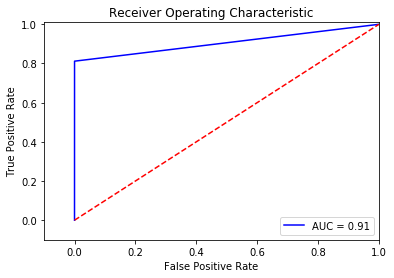

In [30]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()